In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Housing.csv')

In [4]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
data.shape   #the dataset has 543 rows and 13 columns

(545, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [17]:
#DATA PREPROCESSNG
#checking for null values
data.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

In [16]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [33]:
#removing duplicates
counter=0
r,c=data.shape
data.drop_duplicates(inplace=True)

if data.shape==(r,c):
    print("The data doesn't have duplicates")
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-data.shape[0]}')

The data doesn't have duplicates


In [21]:
#converting categorical to numeric
from sklearn.preprocessing import LabelEncoder

In [24]:
categories=["mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea","furnishingstatus"]

#encode
le=LabelEncoder()
data[categories]=data[categories].apply(le.fit_transform)

In [25]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,0,0,0,0,0,0,0
1,12250000,8960,4,4,4,0,0,0,0,0,0,0,0
2,12250000,9960,3,2,2,0,0,0,0,0,0,0,0
3,12215000,7500,4,2,2,0,0,0,0,0,0,0,0
4,11410000,7420,4,1,2,0,0,0,0,0,0,0,0


In [27]:
#correlation
corr=data.corr()
corr

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,0.535997,1.000000,0.151858,0.193820,0.083996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stories,0.420712,0.083996,0.408564,0.326165,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mainroad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guestroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hotwaterheating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airconditioning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

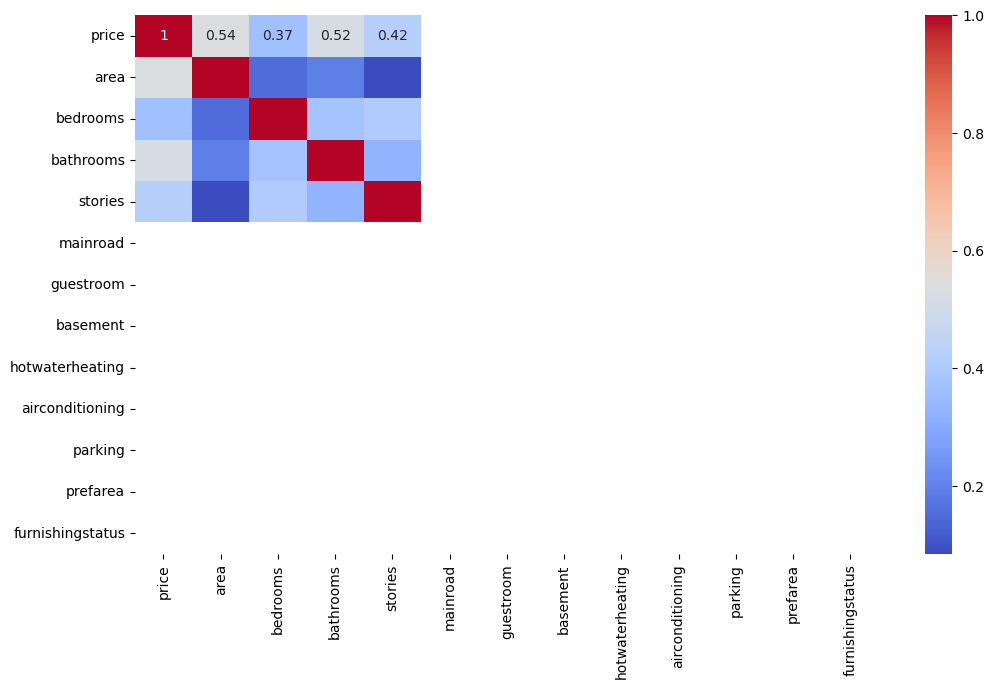

In [39]:
plt.figure(figsize=(12,7))
sns.heatmap(corr,cmap='coolwarm',annot=True)

Text(0.5, 0, 'price')

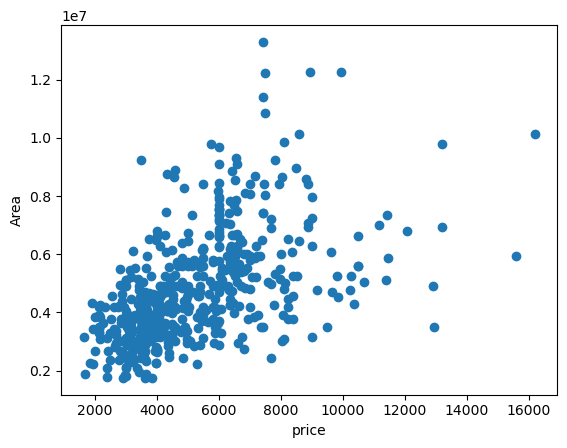

In [43]:
a=data["area"]
b=data["price"]
plt.scatter(a,b)       #how price is dependent on area
plt.ylabel("Area")
plt.xlabel("price")

In [45]:
#splitting the dataset
x=data.drop(['price'],axis=1)
y=data['price']

In [46]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,0,0,0,0,0,0,0,0
1,8960,4,4,4,0,0,0,0,0,0,0,0
2,9960,3,2,2,0,0,0,0,0,0,0,0
3,7500,4,2,2,0,0,0,0,0,0,0,0
4,7420,4,1,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,0,0,0,0,0,0,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,0
542,3620,2,1,1,0,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [47]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 544, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
print("Length of x_train:",len(x_train))
print("Length of x_test:",len(x_test))
print("Length of y_train:",len(y_train))
print("Length of y_test:",len(y_test))

Length of x_train: 435
Length of x_test: 109
Length of y_train: 435
Length of y_test: 109


In [67]:
print("Length of x_train:",x_train.shape)
print("Length of x_test:",x_test.shape)
print("Length of y_train:",y_train.shape)
print("Length of y_test:",y_test.shape)

Length of x_train: (435, 12)
Length of x_test: (109, 12)
Length of y_train: (435,)
Length of y_test: (109,)


In [ ]:
#Linear regression
#using this classification model because of it's simplicity,efficiency and baseline model

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model=LinearRegression()

In [70]:
model.fit(x_train,y_train)

LinearRegression()

In [71]:
#predction
y_predict=model.predict(x_test)
y_predict

array([4045155.82903082, 5154546.49727971, 5382867.43800178,
       3525600.05660378, 3241147.99744496, 6679045.0446346 ,
       4996072.5341995 , 6650379.89856966, 4012907.53970776,
       5729327.51315905, 9342798.57999645, 3434229.90352179,
       4153849.30046748, 5398768.32087619, 4088153.54812823,
       3576764.29001488, 3617378.0395473 , 4815531.62952608,
       4053322.34334451, 3125288.23949207, 5316066.86478241,
       3439604.61840896, 5035894.93990031, 5362647.72713794,
       6820708.11230434, 7451620.24662044, 4225512.16562983,
       4974190.1606807 , 7395394.77537068, 4310203.83704885,
       5643332.07496423, 5904901.53280681, 4240844.96645975,
       5522794.59314277, 3815834.6605113 , 5248658.9342525 ,
       3955577.24757788, 5115535.07304353, 3741588.87988828,
       3373958.38160543, 6230967.5692955 , 3658584.18701565,
       4562327.63189287, 3143203.95578266, 3540932.8574337 ,
       5262135.14783624, 5183490.56423207, 5601334.58366427,
       3254281.3967843 ,

In [72]:
#evaluation
from sklearn.metrics import r2_score,mean_absolute_error

In [74]:
accuracy=r2_score(y_test,y_predict)
accuracy

0.5139987194487204

In [76]:
meanerror=mean_absolute_error(y_test,y_predict)
meanerror

1163572.89854702